**Prepare rules for the all the data sets** <br>
1) Try different values of support and confidence. Observe the change in number of rules for different support, confidence values <br>
2) Change the minimum length in apriori algorithm <br>
3) Visulize the obtained rules using different plots 

#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules

#### Load dataset

In [2]:
book = pd.read_csv('book.csv')

#### EDA on dataset

In [3]:
# Check first 5 records
book.head(5)

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [4]:
# Check last 5 records
book.tail(5)

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0
1999,0,0,0,0,0,0,0,0,0,0,0


In [5]:
# Check for data types, non-null values & memory usage
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [6]:
# Check for the column labels of the DataFrame
book.columns

Index(['ChildBks', 'YouthBks', 'CookBks', 'DoItYBks', 'RefBks', 'ArtBks',
       'GeogBks', 'ItalCook', 'ItalAtlas', 'ItalArt', 'Florence'],
      dtype='object')

In [7]:
# Check the dimensions of the DataFrame
book.shape

(2000, 11)

In [8]:
# Check for the random sample from the DataFrame
book.sample(5)

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
582,1,0,0,0,0,0,1,0,0,0,0
1006,0,0,0,0,0,0,0,0,0,0,0
1282,0,0,0,0,0,0,1,0,0,0,0
1448,0,0,1,1,1,1,1,1,1,1,0
1496,1,0,0,0,0,0,1,0,0,0,0


In [9]:
frequent_itemsets = apriori(book, min_support = 0.005, max_len = 3, use_colnames = True)

frequent_itemsets

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
219,0.0130,"(ItalCook, Florence, GeogBks)"
220,0.0115,"(GeogBks, ItalAtlas, ItalArt)"
221,0.0090,"(Florence, GeogBks, ItalArt)"
222,0.0125,"(ItalCook, ItalAtlas, ItalArt)"


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'support')

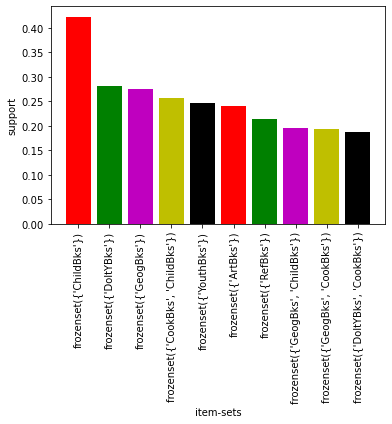

In [10]:
# Most Frequent item sets based on support 
frequent_itemsets.sort_values('support', ascending = False, inplace = True)
plt.bar(x = list(range(1, 11)), height = frequent_itemsets.support[1:11], color = 'rgmyk')
plt.xticks(list(range(1, 11)), frequent_itemsets.itemsets[1:11], rotation = 90)
plt.xlabel('item-sets');plt.ylabel('support')

In [11]:
# Declaring rules variable for association rule
rules = association_rules(frequent_itemsets, metric = "lift", min_threshold = 1)
rules.head(20)
rules.sort_values('lift', ascending = False, inplace = True)

In [12]:
########################## To eliminate Redudancy in Rules #################################### 
def to_list(i):
    return (sorted(list(i)))

In [13]:
ma_X = rules.antecedents.apply(to_list) + rules.consequents.apply(to_list)

ma_X = ma_X.apply(sorted)

rules_sets = list(ma_X)

unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]
index_rules = []

for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))

# getting rules without any redudancy 
rules_no_redudancy  = rules.iloc[index_rules,:]

# Sorting them with respect to list and getting top 10 rules 
rules_no_redudancy.sort_values('lift',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
749,"(RefBks, ItalArt)",(ItalAtlas),0.0200,0.0370,0.0165,0.825000,22.297297,0.015760,5.502857
742,"(ItalAtlas, ArtBks)",(ItalArt),0.0180,0.0485,0.0165,0.916667,18.900344,0.015627,11.418000
350,"(ItalCook, ArtBks)",(ItalArt),0.0565,0.0485,0.0375,0.663717,13.684883,0.034760,2.829461
565,(ItalAtlas),"(ItalCook, RefBks)",0.0370,0.0465,0.0230,0.621622,13.368207,0.021279,2.519964
925,(ItalArt),"(GeogBks, ItalAtlas)",0.0485,0.0205,0.0115,0.237113,11.566507,0.010506,1.283939
901,(ItalArt),"(ItalCook, ItalAtlas)",0.0485,0.0230,0.0125,0.257732,11.205737,0.011385,1.316236
967,(ItalArt),"(ItalCook, Florence)",0.0485,0.0175,0.0095,0.195876,11.192931,0.008651,1.221827
812,"(ChildBks, ItalArt)",(ItalAtlas),0.0360,0.0370,0.0145,0.402778,10.885886,0.013168,1.612465
973,(ItalArt),"(DoItYBks, ItalAtlas)",0.0485,0.0190,0.0095,0.195876,10.309278,0.008578,1.219962
1009,(ItalArt),"(YouthBks, ItalAtlas)",0.0485,0.0175,0.0085,0.175258,10.014728,0.007651,1.191281
